In [1]:
import sklearn as sklearn
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
np.random.seed(0)
Xtr=np.genfromtxt("X_train.txt",delimiter=None)
Ytr=np.genfromtxt("Y_train.txt",delimiter=None)
Xte=np.genfromtxt("X_test.txt",delimiter=None)
Xtr,Ytr=ml.shuffleData(Xtr,Ytr)

In [ ]:
print(np.shape(Xtr))
print(np.shape(Ytr))
print(np.shape(Xte))
print(Xte.shape)

In [3]:
Xtr,Xva,Ytr,Yva=ml.splitData(Xtr,Ytr,0.50)

In [4]:
print(np.shape(Xtr))
print(np.shape(Ytr))
print(np.shape(Xva))
print(Yva.shape)

(50000, 14)
(50000,)
(50000, 14)
(50000,)


In [8]:
mseValues=[]
paramValues=[]
a=1200
while (a<1201):
    
    params = {'n_estimators': 400, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.1, 'loss': 'ls'}
    clf = ensemble.GradientBoostingRegressor(**params)
    clf.fit(Xtr,Ytr)
    YvaHat=clf.predict(Xva)
    mse = mean_squared_error(YvaHat, Yva)
    print("mse: %.4f"+mse)
    a=a+100
    paramValues.append(a)
    mseValues.append(mse)


TypeError: must be str, not numpy.float64

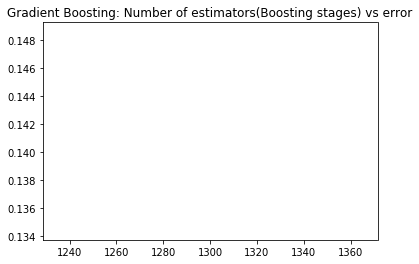

In [27]:
_,axis=plt.subplots() 
plt.title("Gradient Boosting: Number of estimators(Boosting stages) vs error")
axis.plot(paramValues,mseValues,c='green')
plt.show()

In [28]:
#Final prediction with best model on Test data X_test.txt
Yte=clf.predict(Xte)
np.savetxt('GradBoost_ne1200.csv',
np.vstack( (np.arange(len(Yte)) , Yte[:]) ).T,
'%d, %.2f',header='ID,Prediction',comments='',delimiter=',');           
